In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [2]:
# Formules de calcul de matrices
def Mt(d):
    '''Translation'''
    M = np.array([[1, d],
                  [0, 1]])
    return M

def Ml(f):
    '''Thin Lens'''
    M = np.array([[1, 0],
                  [-1/f, 1]])
    return M

In [3]:
def res_axial(pinhole, focal, lens_distance):
    """
    Calcule la résolution axiale en fonction du diamètre du trou, de la focale, et de la distance entre les lentilles.

    Paramètres :
    ------------
    pinhole : float
        Diamètre du trou en mètres.
    focal : float
        Longueur focale de la lentille en mètres.
    lens_distance : float
        Distance entre les lentilles en mètres.

    Retour :
    --------
    res : expression symbolique
        La résolution axiale en mètres.
    """
    f = sp.symbols('f')
    phi = sp.symbols('phi')
    d = sp.symbols('d')
    L = sp.symbols('L')
    z = sp.symbols('z')

    # formation de la matrice de transfert
    M = Mt(f)@Ml(f)@Mt(L)@Ml(f)@Mt(z)
    M_sp = sp.Matrix(M)

    # définition des hauteurs et angles de chaque côté du pinhole
    yf1 = d/2
    alphaf1 = -sp.atan((phi-d)/(2*f))
    
    yf2 = -d/2
    alphaf2 = -sp.atan((phi+d)/(2*f))

    # vecteur décrivant le rayon final au pinhole
    vf1 = sp.Matrix([yf1, alphaf1])
    vf2 = sp.Matrix([yf2, alphaf2])

    # résolution des systemes matriciels puis de leur 1re 
    # equation = 0 pour isoler z
    solve1 = M_sp.LUsolve(vf1)
    z1 = sp.solve(solve1[0], z)

    solve2 = M_sp.LUsolve(vf2)
    z2 = sp.solve(solve2[0], z)

    # substitution des valeurs numeriques
    values = {f:focal, phi:25.4e-3, d:pinhole, L:lens_distance}
    res = z2[0].subs(values) - z1[0].subs(values)

    return res

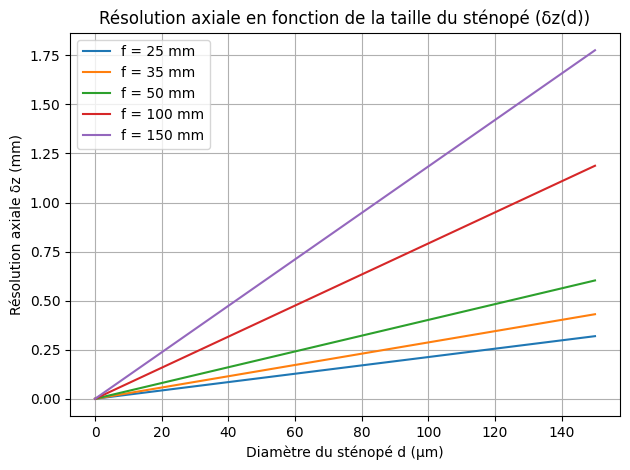

<Figure size 640x480 with 0 Axes>

In [4]:
# set de courbes 1
focals = [25e-3, 35e-3, 50e-3, 100e-3, 150e-3]
pinhole_sizes = np.linspace(0, 150e-6, 100)
L = lambda f: f

plt.figure()

# Tracer une courbe pour chaque focale
for f in focals:
    res_values = [res_axial(d, f, L(f)) * 1e3 for d in pinhole_sizes]
    plt.plot(pinhole_sizes * 1e6, res_values, label=f'f = {f*1e3:.0f} mm')

# Paramètres d'affichage
plt.xlabel("Diamètre du sténopé d (µm)")
plt.ylabel("Résolution axiale δz (mm)")
plt.legend()
plt.grid(True)
plt.title("Résolution axiale en fonction de la taille du sténopé (δz(d))")
plt.tight_layout()
plt.savefig("res_vs_pinhole.png")
plt.show()
plt.clf()

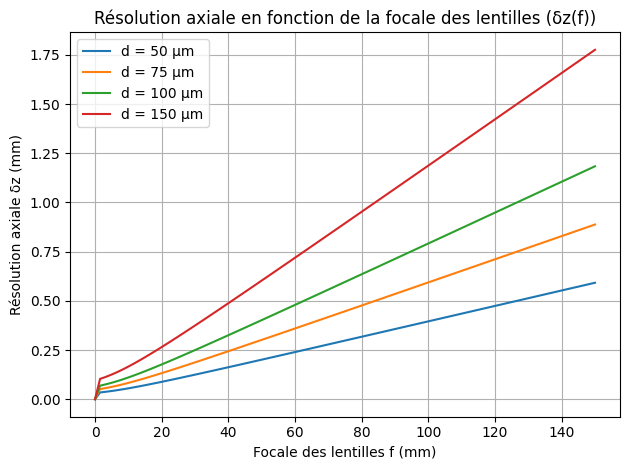

<Figure size 640x480 with 0 Axes>

In [5]:
# set de courbes 2
pinhole_sizes = [50e-6, 75e-6, 100e-6, 150e-6]
focals = np.linspace(1e-6, 150e-3, 100)
L = lambda f: f  # si L(f) appelé, L = f

plt.figure()

# Tracer une courbe pour chaque taille de sténopé
for pinhole in pinhole_sizes:
    res_values = [res_axial(pinhole, f, L(f)) * 1e3 for f in focals]
    plt.plot(focals * 1e3, res_values, label=f'd = {pinhole*1e6:.0f} µm')

# Paramètres d'affichage
plt.xlabel("Focale des lentilles f (mm)")
plt.ylabel("Résolution axiale δz (mm)")
plt.legend()
plt.grid(True)
plt.title("Résolution axiale en fonction de la focale des lentilles (δz(f))")
plt.tight_layout()
plt.savefig("res_vs_focal.png")
plt.show()
plt.clf()

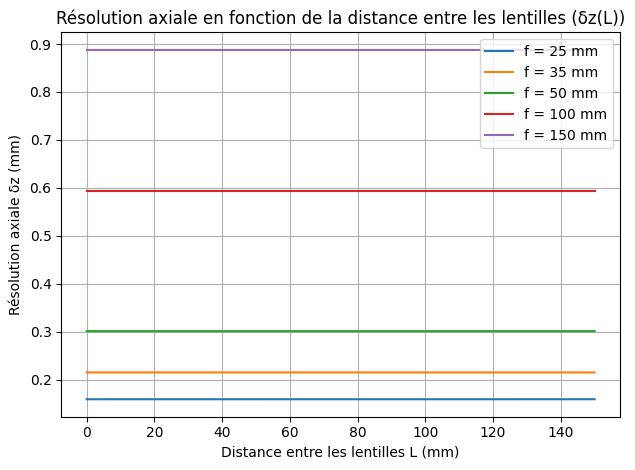

<Figure size 640x480 with 0 Axes>

In [6]:
# set de courbes 3
pinhole = 75e-6  # 75 µm
focals = [25e-3, 35e-3, 50e-3, 100e-3, 150e-3]  # en mètres
lens_distances = np.linspace(0, 150e-3, 100)  # en mètres

plt.figure()

# Tracer une courbe pour chaque taille de focale
for f in focals:
    res_values = [res_axial(pinhole, f, L) * 1e3 for L in lens_distances]
    plt.plot(lens_distances * 1e3, res_values, label=f'f = {f*1e3:.0f} mm')

# Paramètres d'affichage
plt.xlabel("Distance entre les lentilles L (mm)")
plt.ylabel("Résolution axiale δz (mm)")
plt.legend()
plt.grid(True)
plt.title("Résolution axiale en fonction de la distance entre les lentilles (δz(L))")
plt.tight_layout()
plt.savefig("res_vs_L.png")
plt.show()
plt.clf()